<a href="https://colab.research.google.com/github/nmodem2k/Machine-Learning-E2E/blob/master/Hotstar_Views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
data=pd.read_csv('mediacompany.csv')

In [179]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [180]:
data.drop('Unnamed: 7',axis=1,inplace=True)

In [181]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [182]:
data['Date']=pd.to_datetime(data['Date'])

In [183]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [184]:
import datetime

In [185]:
d0=datetime.datetime(2017,2,28)

In [186]:
d0

datetime.datetime(2017, 2, 28, 0, 0)

In [187]:
data['day']=data.Date-d0

In [188]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [189]:
data.day=[int(str(i)[0:2]) for i in data.day]

In [190]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [191]:
data.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80


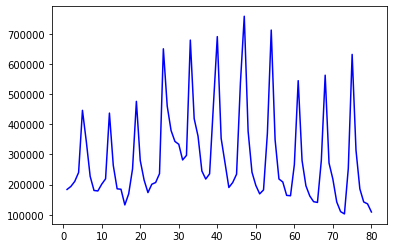

In [192]:
plt.plot(data.day,data.Views_show,'-',c="blue")

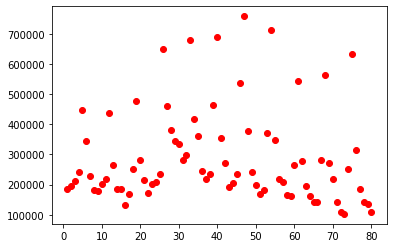

In [193]:
plt.scatter(data.day,data.Views_show,c='red')

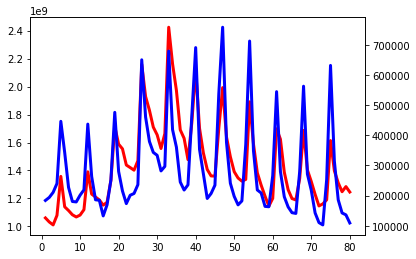

In [194]:

fig, ax1 = plt.subplots()
ax1.plot(data.day,data.Ad_impression,linewidth=3,linestyle='-',color='red')
ax2=ax1.twinx()
ax2.plot(data.day,data.Views_show,linewidth=3,color="blue",linestyle="-")


In [195]:
data['weekday']=(data['day']+3)%7

In [196]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [197]:
X=data[['Visitors','weekday']]

In [198]:
Y=data['Views_show']

In [199]:
from sklearn.linear_model import LinearRegression

In [200]:
l=LinearRegression()

In [201]:
l.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
import statsmodels.api as sm

In [203]:
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()

In [204]:
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     34.48
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.03e-11
Time:                        18:23:43   Log-Likelihood:                -1043.5
No. Observations:                  80   AIC:                             2093.
Df Residuals:                      77   BIC:                             2100.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.058e+04   1.18e+05      0.345      0.731   -1.94e+05    2.75e+05
Visitors       0.2138      0.062      3.445      0.001       0.090       0.337
weekday    -3.704e+04   7110.982     -5.209      0.000   -5.12e+04   -2.29e+04
==============================================================================
Omnibus:                        4.605   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.319
Skew:                           0.569   Prob(JB):                        0.115
Kurtosis:                       2.992   Cond. No.                     1.58e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
def condition(x):
  if x==0 or x==1:
    return 1
  else:
    return 0

In [206]:
data['weekend']=[condition(i) for i in data.weekday]

In [207]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,0,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [208]:
X=data[['Visitors','weekend']]

In [209]:
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()

In [210]:
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.51e-12
Time:                        18:25:55   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
X=data[['Visitors','weekend','Character_A']]
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.53e-14
Time:                        18:27:23   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
data['prev_views']=np.roll(data.Views_show,1)

In [218]:
data.prev_views.replace(108961,0,inplace=True)

In [219]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,prev_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,0,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [221]:
X=data[['Visitors','weekend','Character_A','prev_views']]
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.16e-21
Time:                        18:34:13   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
prev_views      0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
X=data[['Ad_impression','weekend','Character_A']]
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()                                    #coefficient for ad impression is very less
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.05e-26
Time:                        18:41:41   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
data['Ad_impressionpermillion']=data.Ad_impression/1000000

In [225]:
X=data[['Ad_impressionpermillion','weekend','Character_A']]
X1=sm.add_constant(X)
l1=sm.OLS(Y,X1).fit()                                    #coefficient for ad impression is very less
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.05e-26
Time:                        18:42:38   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Ad_impressionpermillion   364.4670     36.909      9.875      0.000     290.957     437.977
weekend                   1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A              -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [227]:
y_pred=l1.predict(X1)

In [228]:
from sklearn.metrics import r2_score,mean_squared_error

In [229]:
print(r2_score(y_pred,Y))

0.7541167825949279
